# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
# API call documentation from openweathermap for 'by city name'
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&unit=imperial
url = "http://api.openweathermap.org/data/2.5/weather?"

# variable lists to fill in for loop for df later
city_name = []
city_lat = []
city_lon = []
city_max_temp = []
city_hum = []
city_cloud = []
city_wind = []
city_cntry = []
city_date = []

print(f"Beginning Data Retrieval")
print("--------------------------")

count=1

for city in cities:
    try:
        # build query url inputing current city, API key, and unit of measure to return
        query_url = f'{url}q={city}&appid={weather_api_key}&units=imperial'
        weather_response = requests.get(query_url).json()
#         print(f"Processing record {count} | City Name: {city}")

        # gather data from cities and store as a variable containing a list of dictionaries 
        # city name, lat, lng, max temp, humidity cloudiness, wind speed, country, date
        city_name.append(weather_response['name'])
        city_lat.append(weather_response['coord']['lat'])
        city_lon.append(weather_response['coord']['lon'])
        city_max_temp.append(weather_response['main']['temp_max'])
        city_hum.append(weather_response['main']['humidity'])
        city_cloud.append(weather_response['clouds']['all'])
        city_wind.append(weather_response['wind']['speed'])
        city_cntry.append(weather_response['sys']['country'])
        city_date.append(weather_response['dt'])

    except:
#         print(f"Skipping, NOT FOUND: Record {count} | City Name: {city}")
        pass
    count = count + 1


print("Data Retrieval Complete")

Beginning Data Retrieval
--------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
city_data_df = pd.DataFrame({"City Name": city_name,
                          "Latitude":city_lat,
                          "Longitude":city_lon,
                          "Max Temp. (F)":city_max_temp,
                          "Humidity (%)":city_hum,
                          "Cloudiness (%)":city_cloud,
                          "Wind Speed (mph)":city_wind,
                          "Country":city_cntry,
                          "Date (UTC)":city_date})
city_data_df.to_csv(output_data_file, encoding="utf-8", index=False)
city_data_df.head(25)
# print(len(city_data_df["City Name"]))
# print(len(city_lat))

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Mar del Plata,-38.0023,-57.5575,66.99,77,75,11.50,AR,1612222476
1,Faanui,-16.4833,-151.7500,81.48,76,16,13.40,PF,1612222476
2,Visby,57.6409,18.2960,32.00,93,90,3.44,SE,1612222477
3,Hermanus,-34.4187,19.2345,63.00,71,0,10.00,ZA,1612222477
4,Umm Kaddadah,13.6017,26.6876,71.35,21,0,10.80,SD,1612222477
5,Thunder Bay,48.4001,-89.3168,28.99,74,90,8.05,CA,1612222268
6,Port-Cartier,50.0334,-66.8654,17.60,73,0,2.30,CA,1612222477
7,Kahului,20.8947,-156.4700,80.60,57,40,18.41,US,1612222291
8,Klyuchi,52.2667,79.1667,2.44,93,40,5.44,RU,1612222478
9,Hilo,19.7297,-155.0900,80.60,50,1,10.36,US,1612222214


# This is not in gitlab instructions and there are no steps to describe what is specifically contained here at this point. Come back to it.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----

In [114]:
# remove all cities with a humidity marked at higher than 100%
clean_city_data = city_data_df.loc[city_data_df["Humidity (%)"] <= 100]
clean_city_data.head(25)
# print(len(clean_city_data["City Name"]))

,City Name,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date (UTC)
0,Mar del Plata,-38.0023,-57.5575,66.99,77,75,11.50,AR,1612222476
1,Faanui,-16.4833,-151.7500,81.48,76,16,13.40,PF,1612222476
2,Visby,57.6409,18.2960,32.00,93,90,3.44,SE,1612222477
3,Hermanus,-34.4187,19.2345,63.00,71,0,10.00,ZA,1612222477
4,Umm Kaddadah,13.6017,26.6876,71.35,21,0,10.80,SD,1612222477
5,Thunder Bay,48.4001,-89.3168,28.99,74,90,8.05,CA,1612222268
6,Port-Cartier,50.0334,-66.8654,17.60,73,0,2.30,CA,1612222477
7,Kahului,20.8947,-156.4700,80.60,57,40,18.41,US,1612222291
8,Klyuchi,52.2667,79.1667,2.44,93,40,5.44,RU,1612222478
9,Hilo,19.7297,-155.0900,80.60,50,1,10.36,US,1612222214


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

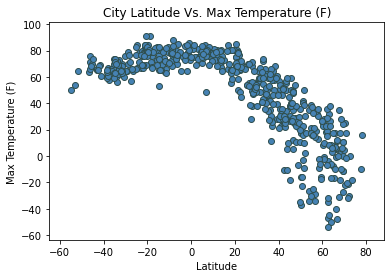

In [141]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temp. (F)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Max Temp. (F)"])-10, max(clean_city_data["Max Temp. (F)"])+10)
plt.show()

## Latitude vs. Humidity Plot

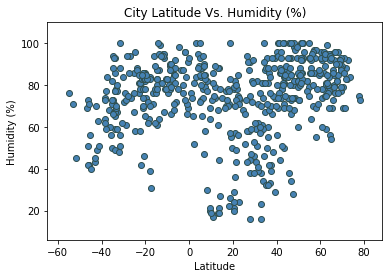

In [142]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Humidity (%)"])-10, max(clean_city_data["Humidity (%)"])+10)
plt.show()

## Latitude vs. Cloudiness Plot

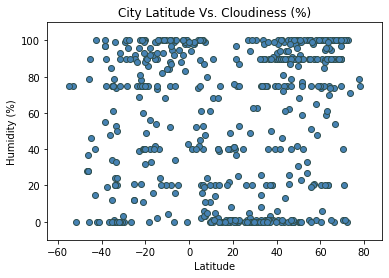

In [144]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness (%)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Cloudiness (%)"])-10, max(clean_city_data["Cloudiness (%)"])+10)
plt.show()

## Latitude vs. Wind Speed Plot

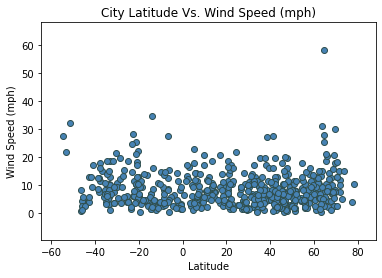

In [145]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed (mph)"], marker="o", facecolors="steelblue", edgecolors="darkslategrey")
plt.title("City Latitude Vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(min(clean_city_data["Latitude"])-10, max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Wind Speed (mph)"])-10, max(clean_city_data["Wind Speed (mph)"])+10)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


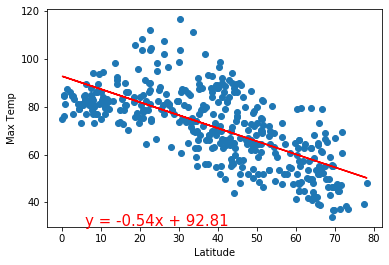

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


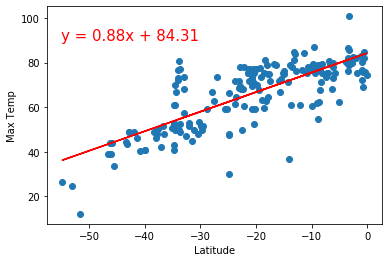

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


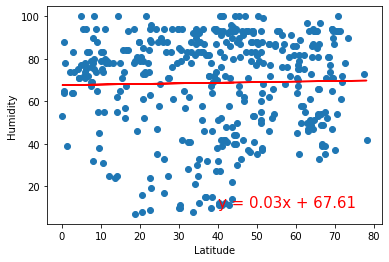

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


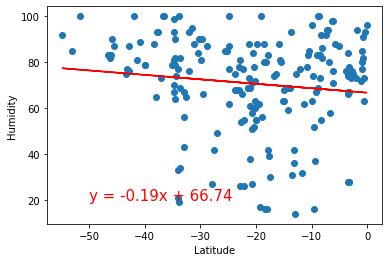

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


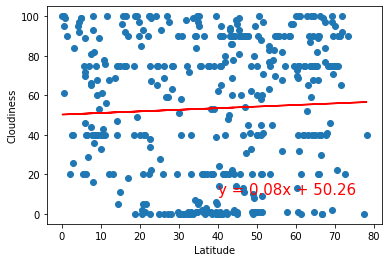

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


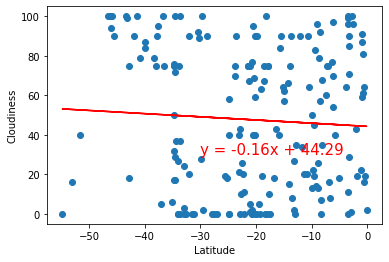

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


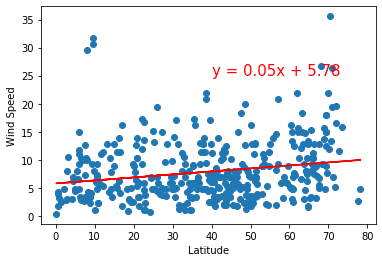

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


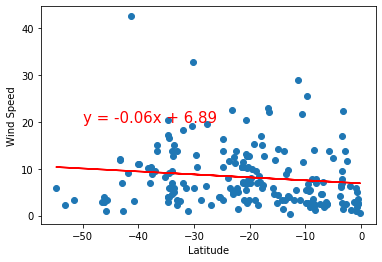